In [3]:
import pandas as pd
import numpy as np

from sklearn.externals import joblib
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  precision_score
from sklearn.metrics import matthews_corrcoef

from sklearn.utils import shuffle
from sklearn.model_selection import  train_test_split

from sklearn.externals import joblib

import numpy as np
import seaborn as sns
import pickle

import matplotlib

In [4]:
def prob2label(pred):
    pred_label = []
    for item in pred:
        if item >= 0.5:
            pred_label.append(1)
        else:
            pred_label.append(0)
    return pred_label

# Use Protein Only

In [5]:
k562_lgb_protein = lgb.Booster(model_file='./model/LGB/k562_protein_lgb.txt')
imr90_lgb_protein = lgb.Booster(model_file='./model/LGB/img90_protein_lgb.txt')
gm12878_lgb_protein = lgb.Booster(model_file='./model/LGB/gm12878_protein_lgb.txt')

huvec_lgb_protein = lgb.Booster(model_file='./model/LGB/huvec_protein_lgb.txt')
nhek_lgb_protein = lgb.Booster(model_file='./model/LGB/nhek_protein_lgb.txt')
helas3_lgb_protein = lgb.Booster(model_file='./model/LGB/helas3_protein_lgb.txt')

In [6]:
k562_svm_protein = joblib.load('./model/RF/k562_svm_protein.model')
imr90_svm_protein = joblib.load('./model/RF/imr90_svm_protein.model')
gm12878_svm_protein = joblib.load('./model/RF/gm12878_svm_protein.model')

huvec_svm_protein = joblib.load('./model/RF/huvec_svm_protein.model')
nhek_svm_protein = joblib.load('./model/RF/nhek_svm_protein.model')
helas3_svm_protein = joblib.load('./model/RF/helas3_svm_protein.model')

/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
k562_ada_protein = joblib.load('./model/Adaboost/k562_ada_protein.model')
imr90_ada_protein = joblib.load('./model/Adaboost/imr90_ada_protein.model')
gm12878_ada_protein = joblib.load('./model/Adaboost/gm12878_ada_protein.model')

huvec_ada_protein = joblib.load('./model/Adaboost/huvec_ada_protein.model')
nhek_ada_protein = joblib.load('./model/Adaboost/nhek_ada_protein.model')
helas3_ada_protein = joblib.load('./model/Adaboost/helas3_ada_protein.model')

/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [8]:
k562_original_data_json = pickle.load(open('./mid-data/K562/k562_original_data_json.pkl','rb'))
gm12878_original_data_json = pickle.load(open('./mid-data/GM12878/gm12878_original_data_json.pkl','rb'))
imr90_original_data_json = pickle.load(open('./mid-data/IMR90/imr90_original_data_json.pkl','rb'))
huvec_original_data_json = pickle.load(open('./mid-data/HUVEC/huvec_original_data_json.pkl','rb'))
nhek_original_data_json = pickle.load(open('./mid-data/NHEK/nhek_original_data_json.pkl','rb'))
helas3_original_data_json = pickle.load(open('./mid-data/HELAS3/helas3_original_data_json.pkl','rb'))


K562X_test = k562_original_data_json['X_test_protein']
K562y_test = k562_original_data_json['y_test_protein']

GM12878X_test = gm12878_original_data_json['X_test_protein']
GM12878y_test = gm12878_original_data_json['y_test_protein']

IMR90X_test = imr90_original_data_json['X_test_protein']
IMR90y_test = imr90_original_data_json['y_test_protein']

HUVECX_test = huvec_original_data_json['X_test_protein']
HUVECy_test = huvec_original_data_json['y_test_protein']


NHEKX_test = nhek_original_data_json['X_test_protein']
NHEKy_test = nhek_original_data_json['y_test_protein']

HELAS3X_test = helas3_original_data_json['X_test_protein']
HELAS3y_test = helas3_original_data_json['y_test_protein']

In [9]:
k562_lgb_protein_f1 = f1_score(K562y_test,prob2label(k562_lgb_protein.predict(K562X_test)))
k562_lgb_protein_auc = roc_auc_score(K562y_test,k562_lgb_protein.predict(K562X_test))

k562_svm_protein_f1 = f1_score(K562y_test,k562_svm_protein.predict(K562X_test))
k562_svm_protein_auc = roc_auc_score(K562y_test,k562_svm_protein.predict(K562X_test))

k562_ada_protein_f1 = f1_score(K562y_test,k562_ada_protein.predict(K562X_test))
k562_ada_protein_auc = roc_auc_score(K562y_test,k562_ada_protein.predict_proba(K562X_test)[:,1])

In [10]:
print('k562 LGB use Protein Only f1={}, auc={}'.format(k562_lgb_protein_f1,k562_lgb_protein_auc))
print('k562 SVM use Protein Only f1={}, auc={}'.format(k562_svm_protein_f1,k562_svm_protein_auc))
print('k562 Adaboost use Protein Only f1={}, auc={}'.format(k562_ada_protein_f1,k562_ada_protein_auc))

k562 LGB use Protein Only f1=0.9017199017199017, auc=0.9559425443196643
k562 SVM use Protein Only f1=0.6801099908340971, auc=0.5517926121102044
k562 Adaboost use Protein Only f1=0.8362369337979093, auc=0.9051955693126295


In [11]:
imr90_lgb_protein_f1 = f1_score(IMR90y_test,prob2label(imr90_lgb_protein.predict(IMR90X_test)))
imr90_lgb_protein_auc = roc_auc_score(IMR90y_test,imr90_lgb_protein.predict(IMR90X_test))

imr90_svm_protein_f1 = f1_score(IMR90y_test,imr90_svm_protein.predict(IMR90X_test))
imr90_svm_protein_auc = roc_auc_score(IMR90y_test,imr90_svm_protein.predict(IMR90X_test))

imr90_ada_protein_f1 = f1_score(IMR90y_test,imr90_ada_protein.predict(IMR90X_test))
imr90_ada_protein_auc = roc_auc_score(IMR90y_test,imr90_ada_protein.predict_proba(IMR90X_test)[:,1])

In [12]:
print('IMR90 LGB use Protein Only f1={}, auc={}'.format(imr90_lgb_protein_f1,imr90_lgb_protein_auc))
print('IMR90 SVM use Protein Only f1={}, auc={}'.format(imr90_svm_protein_f1,imr90_svm_protein_auc))
print('IMR90 Adaboost use Protein Only f1={}, auc={}'.format(imr90_ada_protein_f1,imr90_ada_protein_auc))

IMR90 LGB use Protein Only f1=0.8442622950819674, auc=0.9309954209678192
IMR90 SVM use Protein Only f1=0.6255259467040674, auc=0.5008456052459436
IMR90 Adaboost use Protein Only f1=0.7864271457085829, auc=0.8484132935526588


In [13]:
gm12878_lgb_protein_f1 = f1_score(GM12878y_test,prob2label(gm12878_lgb_protein.predict(GM12878X_test)))
gm12878_lgb_protein_auc = roc_auc_score(GM12878y_test,gm12878_lgb_protein.predict(GM12878X_test))

gm12878_svm_protein_f1 = f1_score(GM12878y_test,gm12878_svm_protein.predict(GM12878X_test))
gm12878_svm_protein_auc = roc_auc_score(GM12878y_test,gm12878_svm_protein.predict(GM12878X_test))

gm12878_ada_protein_f1 = f1_score(GM12878y_test,gm12878_ada_protein.predict(GM12878X_test))
gm12878_ada_protein_auc = roc_auc_score(GM12878y_test,gm12878_ada_protein.predict_proba(GM12878X_test)[:,1])

In [14]:
print('GM12878 LGB use Protein Only f1={}, auc={}'.format(gm12878_lgb_protein_f1,gm12878_lgb_protein_auc))
print('GM12878 SVM use Protein Only f1={}, auc={}'.format(gm12878_svm_protein_f1,gm12878_svm_protein_auc))
print('GM12878 Adaboost use Protein Only f1={}, auc={}'.format(gm12878_ada_protein_f1,gm12878_ada_protein_auc))

GM12878 LGB use Protein Only f1=0.854586129753915, auc=0.9231657030164493
GM12878 SVM use Protein Only f1=0.6974716652136007, auc=0.5735847788086594
GM12878 Adaboost use Protein Only f1=0.7999999999999999, auc=0.8302350858321006


In [15]:
huvec_lgb_protein_f1 = f1_score(HUVECy_test,prob2label(huvec_lgb_protein.predict(HUVECX_test)))
huvec_lgb_protein_auc = roc_auc_score(HUVECy_test,huvec_lgb_protein.predict(HUVECX_test))

huvec_svm_protein_f1 = f1_score(HUVECy_test,huvec_svm_protein.predict(HUVECX_test))
huvec_svm_protein_auc = roc_auc_score(HUVECy_test,huvec_svm_protein.predict(HUVECX_test))

huvec_ada_protein_f1 = f1_score(HUVECy_test,huvec_ada_protein.predict(HUVECX_test))
huvec_ada_protein_auc = roc_auc_score(HUVECy_test,huvec_ada_protein.predict_proba(HUVECX_test)[:,1])

In [16]:
print('HUVEC LGB use Protein Only f1={}, auc={}'.format(huvec_lgb_protein_f1,huvec_lgb_protein_auc))
print('HUVEC SVM use Protein Only f1={}, auc={}'.format(huvec_svm_protein_f1,huvec_svm_protein_auc))
print('HUVEC Adaboost use Protein Only f1={}, auc={}'.format(huvec_ada_protein_f1,huvec_ada_protein_auc))

HUVEC LGB use Protein Only f1=0.8585526315789473, auc=0.9325588656452881
HUVEC SVM use Protein Only f1=0.5987261146496815, auc=0.588957913889816
HUVEC Adaboost use Protein Only f1=0.7974683544303798, auc=0.8463410170002477


In [17]:
nhek_lgb_protein_f1 = f1_score(NHEKy_test,prob2label(nhek_lgb_protein.predict(NHEKX_test)))
nhek_lgb_protein_auc = roc_auc_score(NHEKy_test,nhek_lgb_protein.predict(NHEKX_test))

nhek_svm_protein_f1 = f1_score(NHEKy_test,nhek_svm_protein.predict(NHEKX_test))
nhek_svm_protein_auc = roc_auc_score(NHEKy_test,nhek_svm_protein.predict(NHEKX_test))

nhek_ada_protein_f1 = f1_score(NHEKy_test,nhek_ada_protein.predict(NHEKX_test))
nhek_ada_protein_auc = roc_auc_score(NHEKy_test,nhek_ada_protein.predict_proba(NHEKX_test)[:,1])

In [18]:
print('NHEK LGB use Protein Only f1={}, auc={}'.format(nhek_lgb_protein_f1,nhek_lgb_protein_auc))
print('NHEK SVM use Protein Only f1={}, auc={}'.format(nhek_svm_protein_f1,nhek_svm_protein_auc))
print('NHEK Adaboost use Protein Only f1={}, auc={}'.format(nhek_ada_protein_f1,nhek_ada_protein_auc))

NHEK LGB use Protein Only f1=0.9120287253141832, auc=0.9727702763390319
NHEK SVM use Protein Only f1=0.6493150684931506, auc=0.4978144366935122
NHEK Adaboost use Protein Only f1=0.8596491228070174, auc=0.913460674830095


In [19]:
helas3_lgb_protein_f1 = f1_score(HELAS3y_test,prob2label(helas3_lgb_protein.predict(HELAS3X_test)))
helas3_lgb_protein_auc = roc_auc_score(HELAS3y_test,helas3_lgb_protein.predict(HELAS3X_test))

helas3_svm_protein_f1 = f1_score(HELAS3y_test,helas3_svm_protein.predict(HELAS3X_test))
helas3_svm_protein_auc = roc_auc_score(HELAS3y_test,helas3_svm_protein.predict(HELAS3X_test))

helas3_ada_protein_f1 = f1_score(HELAS3y_test,helas3_ada_protein.predict(HELAS3X_test))
helas3_ada_protein_auc = roc_auc_score(HELAS3y_test,helas3_ada_protein.predict_proba(HELAS3X_test)[:,1])

In [20]:
print('HELAS3 LGB use Protein Only f1={}, auc={}'.format(helas3_lgb_protein_f1,helas3_lgb_protein_auc))
print('HELAS3 SVM use Protein Only f1={}, auc={}'.format(helas3_svm_protein_f1,helas3_svm_protein_auc))
print('HELAS3 Adaboost use Protein Only f1={}, auc={}'.format(helas3_ada_protein_f1,helas3_ada_protein_auc))

HELAS3 LGB use Protein Only f1=0.8920454545454546, auc=0.96152162240304
HELAS3 SVM use Protein Only f1=0.6595538312318138, auc=0.5055759778613027
HELAS3 Adaboost use Protein Only f1=0.8422535211267604, auc=0.8931146999297839


# Use Sequence

In [21]:
k562_lgb_seq = lgb.Booster(model_file='./model/LGB/k562_seq_lgb.txt')
imr90_lgb_seq = lgb.Booster(model_file='./model/LGB/img90_seq_lgb.txt')
gm12878_lgb_seq = lgb.Booster(model_file='./model/LGB/gm12878_seq_lgb.txt')

huvec_lgb_seq = lgb.Booster(model_file='./model/LGB/huvec_seq_lgb.txt')
nhek_lgb_seq = lgb.Booster(model_file='./model/LGB/nhek_seq_lgb.txt')
helas3_lgb_seq = lgb.Booster(model_file='./model/LGB/helas3_seq_lgb.txt')

In [22]:
k562_svm_seq = joblib.load('./model/RF/k562_svm_seq.model')
imr90_svm_seq = joblib.load('./model/RF/imr90_svm_seq.model')
gm12878_svm_seq = joblib.load('./model/RF/gm12878_svm_seq.model')

huvec_svm_seq = joblib.load('./model/RF/huvec_svm_seq.model')
nhek_svm_seq = joblib.load('./model/RF/nhek_svm_seq.model')
helas3_svm_seq = joblib.load('./model/RF/helas3_svm_seq.model')

/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [23]:
k562_ada_seq = joblib.load('./model/Adaboost/k562_ada_seq.model')
imr90_ada_seq = joblib.load('./model/Adaboost/imr90_ada_seq.model')
gm12878_ada_seq = joblib.load('./model/Adaboost/gm12878_ada_seq.model')

huvec_ada_seq = joblib.load('./model/Adaboost/huvec_ada_seq.model')
nhek_ada_seq = joblib.load('./model/Adaboost/nhek_ada_seq.model')
helas3_ada_seq = joblib.load('./model/Adaboost/helas3_ada_seq.model')

/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [24]:

k562_seq_test_x = k562_original_data_json['X_test_seq']
k562_seq_test_y = k562_original_data_json['y_test_seq']

imr90_seq_test_x = imr90_original_data_json['X_test_seq']
imr90_seq_test_y = imr90_original_data_json['y_test_seq']

gm12878_seq_test_x = gm12878_original_data_json['X_test_seq']
gm12878_seq_test_y = gm12878_original_data_json['y_test_seq']

huvec_seq_test_x = huvec_original_data_json['X_test_seq']
huvec_seq_test_y = huvec_original_data_json['y_test_seq']

nhek_seq_test_x = nhek_original_data_json['X_test_seq']
nhek_seq_test_y = nhek_original_data_json['y_test_seq']

helas3_seq_test_x = helas3_original_data_json['X_test_seq']
helas3_seq_test_y = helas3_original_data_json['y_test_seq']

In [25]:
k562_lgb_seq_f1 = f1_score(k562_seq_test_y,prob2label(k562_lgb_seq.predict(k562_seq_test_x)))
k562_lgb_seq_auc = roc_auc_score(k562_seq_test_y,k562_lgb_seq.predict(k562_seq_test_x))

k562_svm_seq_f1 = f1_score(k562_seq_test_y,k562_svm_seq.predict(k562_seq_test_x))
k562_svm_seq_auc = roc_auc_score(k562_seq_test_y,k562_svm_seq.predict(k562_seq_test_x))

k562_ada_seq_f1 = f1_score(k562_seq_test_y,k562_ada_seq.predict(k562_seq_test_x))
k562_ada_seq_auc = roc_auc_score(k562_seq_test_y,k562_ada_seq.predict_proba(k562_seq_test_x)[:,1])

In [26]:
print('K562 LGB use Sequence Only f1={}, auc={}'.format(k562_lgb_seq_f1,k562_lgb_seq_auc))
print('K562 SVM use Sequence Only f1={}, auc={}'.format(k562_svm_seq_f1,k562_svm_seq_auc))
print('K562 Adaboost use Sequence Only f1={}, auc={}'.format(k562_ada_seq_f1,k562_ada_seq_auc))

K562 LGB use Sequence Only f1=0.7652811735941321, auc=0.8513148806630682
K562 SVM use Sequence Only f1=0.6633663366336634, auc=0.565117290424906
K562 Adaboost use Sequence Only f1=0.7113276492082825, auc=0.7591389322350413


In [27]:
imr90_lgb_seq_f1 = f1_score(imr90_seq_test_y,prob2label(imr90_lgb_seq.predict(imr90_seq_test_x)))
imr90_lgb_seq_auc = roc_auc_score(imr90_seq_test_y,imr90_lgb_seq.predict(imr90_seq_test_x))

imr90_svm_seq_f1 = f1_score(imr90_seq_test_y,imr90_svm_seq.predict(imr90_seq_test_x))
imr90_svm_seq_auc = roc_auc_score(imr90_seq_test_y,imr90_svm_seq.predict(imr90_seq_test_x))

imr90_ada_seq_f1 = f1_score(imr90_seq_test_y,imr90_ada_seq.predict(imr90_seq_test_x))
imr90_ada_seq_auc = roc_auc_score(imr90_seq_test_y,imr90_ada_seq.predict_proba(imr90_seq_test_x)[:,1])

In [28]:
print('imr90 LGB use Sequence Only f1={}, auc={}'.format(imr90_lgb_seq_f1,imr90_lgb_seq_auc))
print('imr90 SVM use Sequence Only f1={}, auc={}'.format(imr90_svm_seq_f1,imr90_svm_seq_auc))
print('imr90 Adaboost use Sequence Only f1={}, auc={}'.format(imr90_ada_seq_f1,imr90_ada_seq_auc))

imr90 LGB use Sequence Only f1=0.7717171717171718, auc=0.8648946184405764
imr90 SVM use Sequence Only f1=0.6363636363636364, auc=0.5087193069227947
imr90 Adaboost use Sequence Only f1=0.6802443991853361, auc=0.7364743047688945


In [29]:
gm12878_lgb_seq_f1 = f1_score(gm12878_seq_test_y,prob2label(gm12878_lgb_seq.predict(gm12878_seq_test_x)))
gm12878_lgb_seq_auc = roc_auc_score(gm12878_seq_test_y,gm12878_lgb_seq.predict(gm12878_seq_test_x))

gm12878_svm_seq_f1 = f1_score(gm12878_seq_test_y,gm12878_svm_seq.predict(gm12878_seq_test_x))
gm12878_svm_seq_auc = roc_auc_score(gm12878_seq_test_y,gm12878_svm_seq.predict(gm12878_seq_test_x))

gm12878_ada_seq_f1 = f1_score(gm12878_seq_test_y,gm12878_ada_seq.predict(gm12878_seq_test_x))
gm12878_ada_seq_auc = roc_auc_score(gm12878_seq_test_y,gm12878_ada_seq.predict_proba(gm12878_seq_test_x)[:,1])

print('gm12878 LGB use Sequence Only f1={}, auc={}'.format(gm12878_lgb_seq_f1,gm12878_lgb_seq_auc))
print('gm12878 SVM use Sequence Only f1={}, auc={}'.format(gm12878_svm_seq_f1,gm12878_svm_seq_auc))
print('gm12878 Adaboost use Sequence Only f1={}, auc={}'.format(gm12878_ada_seq_f1,gm12878_ada_seq_auc))

gm12878 LGB use Sequence Only f1=0.7301231802911535, auc=0.8080263098919815
gm12878 SVM use Sequence Only f1=0.6758286176232821, auc=0.5043028102729595
gm12878 Adaboost use Sequence Only f1=0.6695938529088914, auc=0.6819842230289992


In [30]:
huvec_lgb_seq_f1 = f1_score(huvec_seq_test_y,prob2label(huvec_lgb_seq.predict(huvec_seq_test_x)))
huvec_lgb_seq_auc = roc_auc_score(huvec_seq_test_y,huvec_lgb_seq.predict(huvec_seq_test_x))

huvec_svm_seq_f1 = f1_score(huvec_seq_test_y,huvec_svm_seq.predict(huvec_seq_test_x))
huvec_svm_seq_auc = roc_auc_score(huvec_seq_test_y,huvec_svm_seq.predict(huvec_seq_test_x))

huvec_ada_seq_f1 = f1_score(huvec_seq_test_y,huvec_ada_seq.predict(huvec_seq_test_x))
huvec_ada_seq_auc = roc_auc_score(huvec_seq_test_y,huvec_ada_seq.predict_proba(huvec_seq_test_x)[:,1])

print('huvec LGB use Sequence Only f1={}, auc={}'.format(huvec_lgb_seq_f1,huvec_lgb_seq_auc))
print('huvec SVM use Sequence Only f1={}, auc={}'.format(huvec_svm_seq_f1,huvec_svm_seq_auc))
print('huvec Adaboost use Sequence Only f1={}, auc={}'.format(huvec_ada_seq_f1,huvec_ada_seq_auc))

huvec LGB use Sequence Only f1=0.7365079365079364, auc=0.819833981115621
huvec SVM use Sequence Only f1=0.6045801526717558, auc=0.5792088801800153
huvec Adaboost use Sequence Only f1=0.6764227642276422, auc=0.7276945769317729


In [31]:
nhek_lgb_seq_f1 = f1_score(nhek_seq_test_y,prob2label(nhek_lgb_seq.predict(nhek_seq_test_x)))
nhek_lgb_seq_auc = roc_auc_score(nhek_seq_test_y,nhek_lgb_seq.predict(nhek_seq_test_x))

nhek_svm_seq_f1 = f1_score(nhek_seq_test_y,nhek_svm_seq.predict(nhek_seq_test_x))
nhek_svm_seq_auc = roc_auc_score(nhek_seq_test_y,nhek_svm_seq.predict(nhek_seq_test_x))

nhek_ada_seq_f1 = f1_score(nhek_seq_test_y,nhek_ada_seq.predict(nhek_seq_test_x))
nhek_ada_seq_auc = roc_auc_score(nhek_seq_test_y,nhek_ada_seq.predict_proba(nhek_seq_test_x)[:,1])

print('nhek LGB use Sequence Only f1={}, auc={}'.format(nhek_lgb_seq_f1,nhek_lgb_seq_auc))
print('nhek SVM use Sequence Only f1={}, auc={}'.format(nhek_svm_seq_f1,nhek_svm_seq_auc))
print('nhek Adaboost use Sequence Only f1={}, auc={}'.format(nhek_ada_seq_f1,nhek_ada_seq_auc))

nhek LGB use Sequence Only f1=0.8550185873605949, auc=0.9378162330469149
nhek SVM use Sequence Only f1=0.7082767978290366, auc=0.5769063800485016
nhek Adaboost use Sequence Only f1=0.7757352941176471, auc=0.8344360947277027


In [32]:
helas3_lgb_seq_f1 = f1_score(helas3_seq_test_y,prob2label(helas3_lgb_seq.predict(helas3_seq_test_x)))
helas3_lgb_seq_auc = roc_auc_score(helas3_seq_test_y,helas3_lgb_seq.predict(helas3_seq_test_x))

helas3_svm_seq_f1 = f1_score(helas3_seq_test_y,helas3_svm_seq.predict(helas3_seq_test_x))
helas3_svm_seq_auc = roc_auc_score(helas3_seq_test_y,helas3_svm_seq.predict(helas3_seq_test_x))

helas3_ada_seq_f1 = f1_score(helas3_seq_test_y,helas3_ada_seq.predict(helas3_seq_test_x))
helas3_ada_seq_auc = roc_auc_score(helas3_seq_test_y,helas3_ada_seq.predict_proba(helas3_seq_test_x)[:,1])

print('helas3 LGB use Sequence Only f1={}, auc={}'.format(helas3_lgb_seq_f1,helas3_lgb_seq_auc))
print('helas3 SVM use Sequence Only f1={}, auc={}'.format(helas3_svm_seq_f1,helas3_svm_seq_auc))
print('helas3 Adaboost use Sequence Only f1={}, auc={}'.format(helas3_ada_seq_f1,helas3_ada_seq_auc))

helas3 LGB use Sequence Only f1=0.7880512091038406, auc=0.8750154888273924
helas3 SVM use Sequence Only f1=0.470404984423676, auc=0.5101400189996282
helas3 Adaboost use Sequence Only f1=0.7275204359673024, auc=0.7684771384907686


# Sequen+Protein

### all 

In [33]:
used_features = pickle.load(open('./mid-data/used_feature.pkl','rb'))

In [34]:
k562_merged_test_x = k562_original_data_json['X_test_all'][used_features['k562']]
k562_merged_test_y = k562_original_data_json['y_test_all']
k562_merged_train_x = k562_original_data_json['X_train_all'][used_features['k562']]
k562_merged_train_y = k562_original_data_json['y_train_all']

imr90_merged_test_x = imr90_original_data_json['X_test_all'][used_features['imr90']]
imr90_merged_test_y = imr90_original_data_json['y_test_all']
imr90_merged_train_x = imr90_original_data_json['X_train_all'][used_features['imr90']]
imr90_merged_train_y = imr90_original_data_json['y_train_all']

gm12878_merged_test_x = gm12878_original_data_json['X_test_all'][used_features['gm12878']]
gm12878_merged_test_y = gm12878_original_data_json['y_test_all']
gm12878_merged_train_x = gm12878_original_data_json['X_train_all'][used_features['gm12878']]
gm12878_merged_train_y = gm12878_original_data_json['y_train_all']

huvec_merged_test_x = huvec_original_data_json['X_test_all'][used_features['huvec']]
huvec_merged_test_y = huvec_original_data_json['y_test_all']
huvec_merged_train_x = huvec_original_data_json['X_train_all'][used_features['huvec']]
huvec_merged_train_y = huvec_original_data_json['y_train_all']

nhek_merged_test_x = nhek_original_data_json['X_test_all'][used_features['nhek']]
nhek_merged_test_y = nhek_original_data_json['y_test_all']
nhek_merged_train_x = nhek_original_data_json['X_train_all'][used_features['nhek']]
nhek_merged_train_y = nhek_original_data_json['y_train_all']

helas3_merged_test_x = helas3_original_data_json['X_test_all'][used_features['helas3']]
helas3_merged_test_y = helas3_original_data_json['y_test_all']
helas3_merged_train_x = helas3_original_data_json['X_train_all'][used_features['helas3']]
helas3_merged_train_y = helas3_original_data_json['y_train_all']

In [35]:
k562_lgb_merged = lgb.Booster(model_file='./model/LGB/k562_merged_lgb.txt')
imr90_lgb_merged = lgb.Booster(model_file='./model/LGB/img90_merged_lgb.txt')
gm12878_lgb_merged = lgb.Booster(model_file='./model/LGB/gm12878_merged_lgb.txt')

huvec_lgb_merged = lgb.Booster(model_file='./model/LGB/huvec_merged_lgb.txt')
nhek_lgb_merged = lgb.Booster(model_file='./model/LGB/nhek_merged_lgb.txt')
helas3_lgb_merged = lgb.Booster(model_file='./model/LGB/helas3_merged_lgb.txt')

In [36]:
k562_svm_merged = joblib.load('./model/RF/k562_svm_merged.model')
imr90_svm_merged = joblib.load('./model/RF/imr90_svm_merged.model')
gm12878_svm_merged = joblib.load('./model/RF/gm12878_svm_merged.model')

huvec_svm_merged = joblib.load('./model/RF/huvec_svm_merged.model')
nhek_svm_merged = joblib.load('./model/RF/nhek_svm_merged.model')
helas3_svm_merged = joblib.load('./model/RF/helas3_svm_merged.model')

/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [37]:
k562_ada_merged = joblib.load('./model/Adaboost/k562_ada_merged.model')
imr90_ada_merged = joblib.load('./model/Adaboost/imr90_ada_merged.model')
gm12878_ada_merged = joblib.load('./model/Adaboost/gm12878_ada_merged.model')

huvec_ada_merged = joblib.load('./model/Adaboost/huvec_ada_merged.model')
nhek_ada_merged = joblib.load('./model/Adaboost/nhek_ada_merged.model')
helas3_ada_merged = joblib.load('./model/Adaboost/helas3_ada_merged.model')

/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [38]:
k562_lgb_merged_f1 = f1_score(k562_merged_test_y,prob2label(k562_lgb_merged.predict(k562_merged_test_x)))
k562_lgb_merged_auc = roc_auc_score(k562_merged_test_y,k562_lgb_merged.predict(k562_merged_test_x))
k562_lgb_merged_mcc = matthews_corrcoef(k562_merged_test_y,prob2label(k562_lgb_merged.predict(k562_merged_test_x)))

k562_svm_merged_f1 = f1_score(k562_merged_test_y,k562_svm_merged.predict(k562_merged_test_x))
k562_svm_merged_auc = roc_auc_score(k562_merged_test_y,k562_svm_merged.predict(k562_merged_test_x))
k562_svm_merged_mcc = matthews_corrcoef(k562_merged_test_y,k562_svm_merged.predict(k562_merged_test_x))

k562_ada_merged_f1 = f1_score(k562_merged_test_y,k562_ada_merged.predict(k562_merged_test_x))
k562_ada_merged_auc = roc_auc_score(k562_merged_test_y,k562_ada_merged.predict_proba(k562_merged_test_x)[:,1])
k562_ada_merged_mcc = matthews_corrcoef(k562_merged_test_y,k562_ada_merged.predict(k562_merged_test_x))

print('K562 LGB use Protein+Sequence  f1={}, auc={},mcc={}'.format(k562_lgb_merged_f1,k562_lgb_merged_auc,k562_lgb_merged_mcc))
print('K562 SVM use Protein+Sequence  f1={}, auc={},mcc={}'.format(k562_svm_merged_f1,k562_svm_merged_auc,k562_svm_merged_mcc))
print('K562 Adaboost Protein+Sequence  f1={}, auc={},mcc={}'.format(k562_ada_merged_f1,k562_ada_merged_auc,k562_ada_merged_mcc))

K562 LGB use Protein+Sequence  f1=0.905055487053021, auc=0.9570553324294595,mcc=0.8052574077780739
K562 SVM use Protein+Sequence  f1=0.6568848758465011, auc=0.6136195032104577,mcc=0.2329712575434129
K562 Adaboost Protein+Sequence  f1=0.8339222614840989, auc=0.8924432733877362,mcc=0.6464748572140019


In [39]:
imr90_lgb_merged_f1 = f1_score(imr90_merged_test_y,prob2label(imr90_lgb_merged.predict(imr90_merged_test_x)))
imr90_lgb_merged_auc = roc_auc_score(imr90_merged_test_y,imr90_lgb_merged.predict(imr90_merged_test_x))
imr90_lgb_merged_mcc = matthews_corrcoef(imr90_merged_test_y,prob2label(imr90_lgb_merged.predict(imr90_merged_test_x)))


imr90_svm_merged_f1 = f1_score(imr90_merged_test_y,imr90_svm_merged.predict(imr90_merged_test_x))
imr90_svm_merged_auc = roc_auc_score(imr90_merged_test_y,imr90_svm_merged.predict(imr90_merged_test_x))
imr90_svm_merged_mcc = matthews_corrcoef(imr90_merged_test_y,imr90_svm_merged.predict(imr90_merged_test_x))

imr90_ada_merged_f1 = f1_score(imr90_merged_test_y,imr90_ada_merged.predict(imr90_merged_test_x))
imr90_ada_merged_auc = roc_auc_score(imr90_merged_test_y,imr90_ada_merged.predict_proba(imr90_merged_test_x)[:,1])
imr90_ada_merged_mcc = matthews_corrcoef(imr90_merged_test_y,imr90_ada_merged.predict(imr90_merged_test_x))


print('imr90 LGB use Protein+Sequence  f1={}, auc={},mcc={}'.format(imr90_lgb_merged_f1,imr90_lgb_merged_auc,imr90_lgb_merged_mcc))
print('imr90 SVM use Protein+Sequence  f1={}, auc={},mcc={}'.format(imr90_svm_merged_f1,imr90_svm_merged_auc,imr90_svm_merged_mcc))
print('imr90 Adaboost Protein+Sequence  f1={}, auc={},mcc={}'.format(imr90_ada_merged_f1,imr90_ada_merged_auc,imr90_ada_merged_mcc))

imr90 LGB use Protein+Sequence  f1=0.8459958932238193, auc=0.9280437800149977,mcc=0.7039148707871201
imr90 SVM use Protein+Sequence  f1=0.6271186440677966, auc=0.5772931059240232,mcc=0.17010095278064277
imr90 Adaboost Protein+Sequence  f1=0.7588932806324111, auc=0.8505831485233817,mcc=0.5235878199620787


In [40]:
gm12878_lgb_merged_f1 = f1_score(gm12878_merged_test_y,prob2label(gm12878_lgb_merged.predict(gm12878_merged_test_x)))
gm12878_lgb_merged_auc = roc_auc_score(gm12878_merged_test_y,gm12878_lgb_merged.predict(gm12878_merged_test_x))
gm12878_lgb_merged_mcc = matthews_corrcoef(gm12878_merged_test_y,prob2label(gm12878_lgb_merged.predict(gm12878_merged_test_x)))


gm12878_svm_merged_f1 = f1_score(gm12878_merged_test_y,gm12878_svm_merged.predict(gm12878_merged_test_x))
gm12878_svm_merged_auc = roc_auc_score(gm12878_merged_test_y,gm12878_svm_merged.predict(gm12878_merged_test_x))
gm12878_svm_merged_mcc = matthews_corrcoef(gm12878_merged_test_y,gm12878_svm_merged.predict(gm12878_merged_test_x))


gm12878_ada_merged_f1 = f1_score(gm12878_merged_test_y,gm12878_ada_merged.predict(gm12878_merged_test_x))
gm12878_ada_merged_auc = roc_auc_score(gm12878_merged_test_y,gm12878_ada_merged.predict_proba(gm12878_merged_test_x)[:,1])
gm12878_ada_merged_mcc = matthews_corrcoef(gm12878_merged_test_y,gm12878_ada_merged.predict(gm12878_merged_test_x))


print('gm12878 LGB use Protein+Sequence  f1={}, auc={},mcc={}'.format(gm12878_lgb_merged_f1,gm12878_lgb_merged_auc,gm12878_lgb_merged_mcc))
print('gm12878 SVM use Protein+Sequence  f1={}, auc={},mcc={}'.format(gm12878_svm_merged_f1,gm12878_svm_merged_auc,gm12878_svm_merged_mcc))
print('gm12878 Adaboost Protein+Sequence  f1={}, auc={},mcc={}'.format(gm12878_ada_merged_f1,gm12878_ada_merged_auc,gm12878_ada_merged_mcc))

gm12878 LGB use Protein+Sequence  f1=0.8539576365663322, auc=0.9191934471785217,mcc=0.6893702227078095
gm12878 SVM use Protein+Sequence  f1=0.6995594713656387, auc=0.5814004302810273,mcc=0.21016303670091954
gm12878 Adaboost Protein+Sequence  f1=0.7845993756503642, auc=0.8256969656223387,mcc=0.5130511181048277


In [41]:
huvec_lgb_merged_f1 = f1_score(huvec_merged_test_y,prob2label(huvec_lgb_merged.predict(huvec_merged_test_x)))
huvec_lgb_merged_auc = roc_auc_score(huvec_merged_test_y,huvec_lgb_merged.predict(huvec_merged_test_x))
huvec_lgb_merged_mcc = matthews_corrcoef(huvec_merged_test_y,prob2label(huvec_lgb_merged.predict(huvec_merged_test_x)))


huvec_svm_merged_f1 = f1_score(huvec_merged_test_y,huvec_svm_merged.predict(huvec_merged_test_x))
huvec_svm_merged_auc = roc_auc_score(huvec_merged_test_y,huvec_svm_merged.predict(huvec_merged_test_x))
huvec_svm_merged_mcc = matthews_corrcoef(huvec_merged_test_y,huvec_svm_merged.predict(huvec_merged_test_x))


huvec_ada_merged_f1 = f1_score(huvec_merged_test_y,huvec_ada_merged.predict(huvec_merged_test_x))
huvec_ada_merged_auc = roc_auc_score(huvec_merged_test_y,huvec_ada_merged.predict_proba(huvec_merged_test_x)[:,1])
huvec_ada_merged_mcc = matthews_corrcoef(huvec_merged_test_y,huvec_ada_merged.predict(huvec_merged_test_x))


print('huvec LGB use Protein+Sequence  f1={}, auc={},mcc={}'.format(huvec_lgb_merged_f1,huvec_lgb_merged_auc,huvec_lgb_merged_mcc))
print('huvec SVM use Protein+Sequence  f1={}, auc={},mcc={}'.format(huvec_svm_merged_f1,huvec_svm_merged_auc,huvec_svm_merged_mcc))
print('huvec Adaboost Protein+Sequence  f1={}, auc={},mcc={}'.format(huvec_ada_merged_f1,huvec_ada_merged_auc,huvec_ada_merged_mcc))

huvec LGB use Protein+Sequence  f1=0.8655737704918033, auc=0.9358749367470204,mcc=0.7338314617629009
huvec SVM use Protein+Sequence  f1=0.6243093922651933, auc=0.5623216804297972,mcc=0.1367626292359096
huvec Adaboost Protein+Sequence  f1=0.7735537190082645, auc=0.8515089200159343,mcc=0.5522956542364212


In [42]:
nhek_lgb_merged_f1 = f1_score(nhek_merged_test_y,prob2label(nhek_lgb_merged.predict(nhek_merged_test_x)))
nhek_lgb_merged_auc = roc_auc_score(nhek_merged_test_y,nhek_lgb_merged.predict(nhek_merged_test_x))
nhek_lgb_merged_mcc = matthews_corrcoef(nhek_merged_test_y,prob2label(nhek_lgb_merged.predict(nhek_merged_test_x)))


nhek_svm_merged_f1 = f1_score(nhek_merged_test_y,nhek_svm_merged.predict(nhek_merged_test_x))
nhek_svm_merged_auc = roc_auc_score(nhek_merged_test_y,nhek_svm_merged.predict(nhek_merged_test_x))
nhek_svm_merged_mcc = matthews_corrcoef(nhek_merged_test_y,nhek_svm_merged.predict(nhek_merged_test_x))


nhek_ada_merged_f1 = f1_score(nhek_merged_test_y,nhek_ada_merged.predict(nhek_merged_test_x))
nhek_ada_merged_auc = roc_auc_score(nhek_merged_test_y,nhek_ada_merged.predict_proba(nhek_merged_test_x)[:,1])
nhek_ada_merged_mcc = matthews_corrcoef(nhek_merged_test_y,nhek_ada_merged.predict(nhek_merged_test_x))


print('nhek LGB use Protein+Sequence  f1={}, auc={},mcc={}'.format(nhek_lgb_merged_f1,nhek_lgb_merged_auc,nhek_lgb_merged_mcc))
print('nhek SVM use Protein+Sequence  f1={}, auc={},mcc={}'.format(nhek_svm_merged_f1,nhek_svm_merged_auc,nhek_svm_merged_mcc))
print('nhek Adaboost Protein+Sequence  f1={}, auc={},mcc={}'.format(nhek_ada_merged_f1,nhek_ada_merged_auc,nhek_ada_merged_mcc))

nhek LGB use Protein+Sequence  f1=0.9236363636363637, auc=0.9783389718870693,mcc=0.8408576460002464
nhek SVM use Protein+Sequence  f1=0.598326359832636, auc=0.6301308344061556,mcc=0.2639868180502183
nhek Adaboost Protein+Sequence  f1=0.857638888888889, auc=0.9244184305859107,mcc=0.6948363120018994


In [43]:
helas3_lgb_merged_f1 = f1_score(helas3_merged_test_y,prob2label(helas3_lgb_merged.predict(helas3_merged_test_x)))
helas3_lgb_merged_auc = roc_auc_score(helas3_merged_test_y,helas3_lgb_merged.predict(helas3_merged_test_x))
helas3_lgb_merged_mcc = matthews_corrcoef(helas3_merged_test_y,prob2label(helas3_lgb_merged.predict(helas3_merged_test_x)))

helas3_svm_merged_f1 = f1_score(helas3_merged_test_y,helas3_svm_merged.predict(helas3_merged_test_x))
helas3_svm_merged_auc = roc_auc_score(helas3_merged_test_y,helas3_svm_merged.predict(helas3_merged_test_x))
helas3_svm_merged_mcc = matthews_corrcoef(helas3_merged_test_y,helas3_svm_merged.predict(helas3_merged_test_x))


helas3_ada_merged_f1 = f1_score(helas3_merged_test_y,helas3_ada_merged.predict(helas3_merged_test_x))
helas3_ada_merged_auc = roc_auc_score(helas3_merged_test_y,helas3_ada_merged.predict_proba(helas3_merged_test_x)[:,1])
helas3_ada_merged_mcc = matthews_corrcoef(helas3_merged_test_y,helas3_ada_merged.predict(helas3_merged_test_x))


print('helas3 LGB use Protein+Sequence  f1={}, auc={},mcc={}'.format(helas3_lgb_merged_f1,helas3_lgb_merged_auc,helas3_lgb_merged_mcc))
print('helas3 SVM use Protein+Sequence  f1={}, auc={},mcc={}'.format(helas3_svm_merged_f1,helas3_svm_merged_auc,helas3_svm_merged_mcc))
print('helas3 Adaboost Protein+Sequence  f1={}, auc={},mcc={}'.format(helas3_ada_merged_f1,helas3_ada_merged_auc,helas3_ada_merged_mcc))

helas3 LGB use Protein+Sequence  f1=0.8962536023054756, auc=0.9623559539052498,mcc=0.7936349333177847
helas3 SVM use Protein+Sequence  f1=0.304147465437788, auc=0.5587460245343026,mcc=0.17262341884910998
helas3 Adaboost Protein+Sequence  f1=0.8368794326241136, auc=0.8948742307215728,mcc=0.6713106470595223


# Use all features

In [44]:
def get_used_features():
    for k,v in used_features.items():
        cell = k
        epi_count = 0
        seq_count = 0
        for item in v:
            if len(item)>5:
                epi_count +=1
            else:
                seq_count += 1
        
        print('cell {}\t epifeatures {}\t sequence_features {}'.format(k,epi_count,seq_count))
    

In [45]:
get_used_features()

cell k562	 epifeatures 1199	 sequence_features 166
cell imr90	 epifeatures 253	 sequence_features 198
cell gm12878	 epifeatures 405	 sequence_features 175
cell huvec	 epifeatures 332	 sequence_features 285
cell nhek	 epifeatures 219	 sequence_features 167
cell helas3	 epifeatures 294	 sequence_features 232


# Top Feature Include

In [46]:
lgb_param = {
    'num_leaves':31, 
    'objective':'binary',
    'max_depth':None,
    'min_data_in_leaf':1,
    'learning_rate':0.03,
    'max_bin':None,
    'bagging_fraction':0.8,
    #'feature_fraction':0.8,
    #'bagging_freq':50,
    'tree_learner_type':'voting',
    'boosting_type':'gbdt',
    'metric':['binary_logloss']}
num_round = 1000
early_stop = 50
nfold = 100

In [47]:
def get_lgb_feature_top(model,topN):
    feature_imp_val = model.feature_importance()
    feature_name = model.feature_name()
    feature_imp = np.c_[feature_name,feature_imp_val]
    feature_imp = pd.DataFrame(feature_imp,columns=['feature_name','feature_score'])
    feature_imp = feature_imp.sort_values(by='feature_score',ascending=False)
    feature_imp['feature_score'] = feature_imp['feature_score'].astype(float)
    feature_imp = feature_imp[:topN]
    return feature_imp

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

def generate_lgb_use_data(X_train,y_train,X_test,y_test):
    train_x = X_train[:int(0.9*X_train.shape[0])]
    train_y = y_train[:int(0.9*X_train.shape[0])]
    valid_x = X_train[int(0.9*X_train.shape[0]):]
    valid_y = y_train[int(0.9*X_train.shape[0]):]
    lgb_train = lgb.Dataset(data=train_x,label=train_y)
    lgb_valid = lgb.Dataset(data=valid_x,label=valid_y)
    lgb_test = lgb.Dataset(data=X_test,label=y_test)
    
    return lgb_train,lgb_valid,lgb_test

def train_lgb(train_data,val_data,lgb_param,num_round,early_stop,nfold,is_cv=True):
    evals_result = {}
    if is_cv:
        lgb_model = lgb.cv(params=lgb_param, 
                      train_set = train_data, 
                       num_boost_round = num_round,
                      feval=lgb_f1_score, 
                      early_stopping_rounds=early_stop,
                       nfold=nfold,
                       verbose_eval=False
                      )
    if not is_cv:
        lgb_model = lgb.train(params=lgb_param, 
                              train_set = train_data, 
                              valid_sets=[val_data, train_data], 
                              valid_names=['val', 'train'],
                              num_boost_round = num_round,
                              feval=lgb_f1_score, 
                              #early_stopping_rounds=early_stop,
                              verbose_eval=False)
    
    return lgb_model


In [48]:
def model_topn(topN_vec,model,train_x,test_x,train_y,test_y,cell,type):
    res = []
    for topN in topN_vec:
        features = get_lgb_feature_top(model,topN)
        features = features['feature_name'].tolist()
        
        train_x_ = train_x[features]
        test_x_ = test_x[features]
        
        train_lgb_,valid_lgb_,_ = generate_lgb_use_data(train_x_,train_y,test_x_,test_y)
        
        lgb = train_lgb(train_lgb_,valid_lgb_,lgb_param,num_round,early_stop,nfold,is_cv=False)

        lgb_pred = lgb.predict(test_x_,num_iteration=lgb.best_iteration)
        f1 = f1_score(test_y,prob2label(lgb_pred))
        print('cell={} On type={} use topN={},f1={}'.format(cell,type,topN,f1))
        res.append(f1)
    return res

In [49]:
topn_vec = [20,60,100,140,180]

### all features top n

In [50]:
k562_topn_merged = model_topn(topn_vec,k562_lgb_merged,k562_merged_train_x,
                               k562_merged_test_x,k562_merged_train_y,k562_merged_test_y,
                               'k562','all')

cell=k562 On type=all use topN=20,f1=0.8574908647990255
cell=k562 On type=all use topN=60,f1=0.886977886977887
cell=k562 On type=all use topN=100,f1=0.8733087330873308
cell=k562 On type=all use topN=140,f1=0.889705882352941
cell=k562 On type=all use topN=180,f1=0.8905109489051095


In [51]:
gm12878_topn_merged = model_topn(topn_vec,
                                 gm12878_lgb_merged,
                                 gm12878_merged_train_x,
                                gm12878_merged_test_x,
                                 gm12878_merged_train_y,
                                 gm12878_merged_test_y,
                                 'GM12878','all')

cell=GM12878 On type=all use topN=20,f1=0.6554433221099888


/opt/current-env/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


cell=GM12878 On type=all use topN=60,f1=0.7469879518072289
cell=GM12878 On type=all use topN=100,f1=0.7812840043525571
cell=GM12878 On type=all use topN=140,f1=0.7885462555066078
cell=GM12878 On type=all use topN=180,f1=0.8129175946547884


In [52]:
imr90_topn_merged = model_topn(topn_vec,imr90_lgb_merged,
                                imr90_merged_train_x,
                                imr90_merged_test_x,
                                 imr90_merged_train_y,
                                 imr90_merged_test_y,
                               'IMR90','all')

cell=IMR90 On type=all use topN=20,f1=0.7243460764587525
cell=IMR90 On type=all use topN=60,f1=0.7667342799188641
cell=IMR90 On type=all use topN=100,f1=0.7695473251028807
cell=IMR90 On type=all use topN=140,f1=0.7992125984251968
cell=IMR90 On type=all use topN=180,f1=0.8117647058823529


In [53]:
huvec_topn_merged = model_topn(topn_vec,huvec_lgb_merged,
                               huvec_merged_train_x,
                                huvec_merged_test_x,
                                 huvec_merged_train_y,
                                 huvec_merged_test_y
                               ,'IHUVEC','all')

cell=IHUVEC On type=all use topN=20,f1=0.7684887459807075
cell=IHUVEC On type=all use topN=60,f1=0.8045234248788369
cell=IHUVEC On type=all use topN=100,f1=0.799347471451876
cell=IHUVEC On type=all use topN=140,f1=0.7823240589198036
cell=IHUVEC On type=all use topN=180,f1=0.7927631578947368


In [54]:
nhek_topn_merged = model_topn(topn_vec,nhek_lgb_merged,
                                 nhek_merged_train_x,
                                nhek_merged_test_x,
                                 nhek_merged_train_y,
                                 nhek_merged_test_y,
                              'NHEK','all')

cell=NHEK On type=all use topN=20,f1=0.8601769911504425
cell=NHEK On type=all use topN=60,f1=0.881294964028777
cell=NHEK On type=all use topN=100,f1=0.8849557522123894
cell=NHEK On type=all use topN=140,f1=0.8971631205673759
cell=NHEK On type=all use topN=180,f1=0.9253187613843352


In [55]:
helas3_topn_merged = model_topn(topn_vec,helas3_lgb_merged,
                                helas3_merged_train_x,
                                helas3_merged_test_x,
                                 helas3_merged_train_y,
                                 helas3_merged_test_y,
                                'HELAS3','all')

cell=HELAS3 On type=all use topN=20,f1=0.7417974322396578
cell=HELAS3 On type=all use topN=60,f1=0.7926657263751763
cell=HELAS3 On type=all use topN=100,f1=0.8106591865357644
cell=HELAS3 On type=all use topN=140,f1=0.8567293777134588
cell=HELAS3 On type=all use topN=180,f1=0.8709219858156029


# Visualiazation

In [56]:
import matplotlib.pyplot as plt

In [57]:
y_ticks = [0.2,0.4,0.6,0.8]

In [58]:
various_region = ['Enhancer','Promoter2k','Window','EPW','sequence']

In [59]:
import matplotlib.gridspec as gridspec

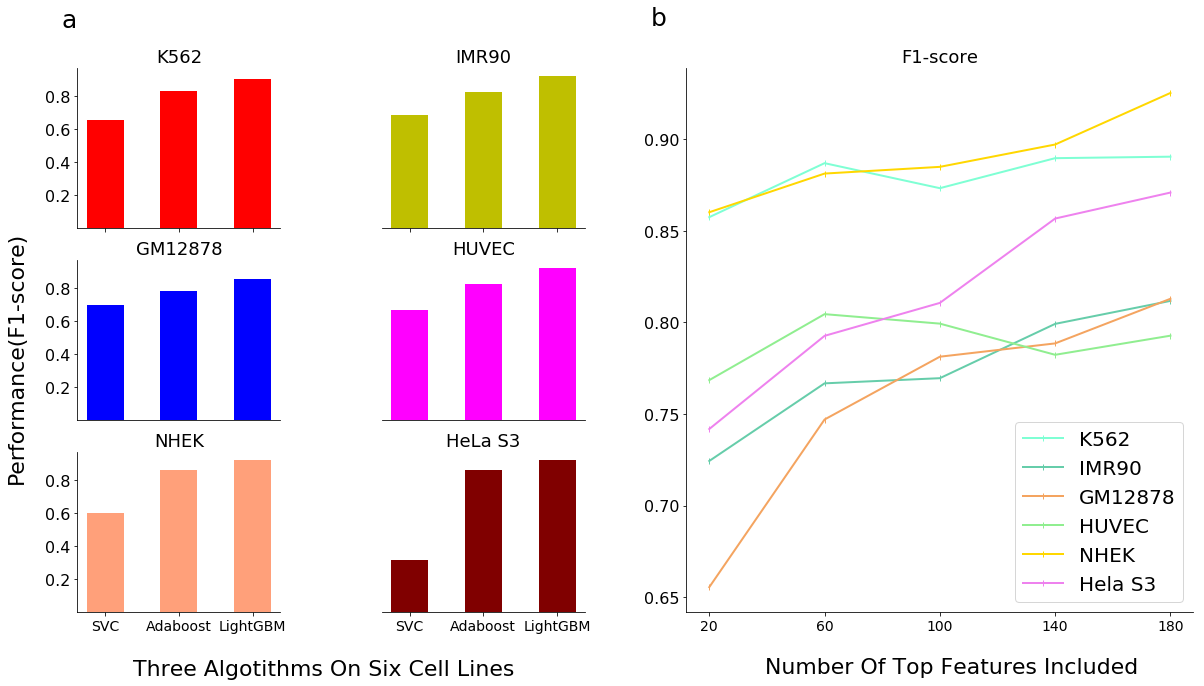

In [65]:
def vis21():
    matplotlib.rc("legend", fontsize=20)
    x_tick_size = 14
    y_tick_size = 16
    title_size = 18
    
    x_varies_model = ['SVC','Adaboost','LightGBM']
    width = 0.5
    fig = plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(3,4)
    ##########################################################
    ax1 = plt.subplot(gs[0, 0])
    ax1.bar(x_varies_model, [k562_svm_merged_f1,k562_ada_merged_f1,k562_lgb_merged_f1], width,color='r')
    ax1.set_yticks(y_ticks)
    #ax1.set_ylim(0.5,0.96)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_title('K562',fontsize=title_size)
    #ax1.margins(x=0, y=0)
    plt.xticks(fontsize=x_tick_size)
    plt.yticks(fontsize=y_tick_size)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ##############################################################
    ax2 = plt.subplot(gs[0, 1])
    ax2.bar(x_varies_model, [imr90_svm_merged_f1,imr90_ada_merged_f1,imr90_lgb_merged_f1], width,color='y')
    ax2.set_yticks([])
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    #ax2.spines['left'].set_visible(False)
    #ax2.set_yticks([])
    ax2.set_title('IMR90',fontsize=title_size)
    #ax2.margins(x=5, y=5)   
    plt.xticks(fontsize=x_tick_size)
    plt.yticks(fontsize=y_tick_size)
    plt.setp(ax2.get_xticklabels(), visible=False)
    ###################################################################
    ax3 = plt.subplot(gs[1, 0],sharey=ax1)
    ax3.bar(x_varies_model, [gm12878_svm_merged_f1,gm12878_ada_merged_f1,gm12878_lgb_merged_f1], width,color='b')
    #ax3.set_yticks(y_ticks)
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    #ax3.spines['left'].set_visible(False)
    ax3.set_title('GM12878',fontsize=title_size)
    #ax3.set_yticks(y_ticks)
    ax3.set_xticks([])
    #ax3.set_xlabel('3 cell lines on 4 algorithms',size=15)
    plt.xticks(fontsize=x_tick_size)
    plt.yticks(fontsize=y_tick_size)

    ax3.annotate('Performance(F1-score)', (-0.1, 0.4), xytext=(-30, -1),
                        textcoords='offset points', xycoords='axes fraction',
                        ha='right', va='center', size=22, rotation=90)

    ax3.annotate('a', (-0.01,2.5),xytext=(1, 0),
                        textcoords='offset points', xycoords='axes fraction',
                        ha='right', va='center', size=25, rotation=0)
    ######################################################################
    ax4 = plt.subplot(gs[1, 1])
    ax4.bar(x_varies_model, [huvec_svm_merged_f1,huvec_ada_merged_f1,huvec_lgb_merged_f1], width,color='fuchsia')
    ax4.set_xticks([])
    ax4.set_yticks([])
    #ax1.set_ylim(0.5,0.96)
    ax4.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.spines['left'].set_visible(False)
    
    ax4.set_title('HUVEC',fontsize=title_size)
    plt.xticks(fontsize=x_tick_size)
    plt.yticks(fontsize=y_tick_size)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ##############################################
    ax5 = plt.subplot(gs[2, 0],sharey=ax1)
    ax5.bar(x_varies_model,[nhek_svm_merged_f1,nhek_ada_merged_f1,nhek_lgb_merged_f1], width,color='lightsalmon')
    #ax5.set_yticks([])
    #ax5.set_xticks([])
    ax5.spines['right'].set_visible(False)
    ax5.spines['top'].set_visible(False)
    #ax5.spines['left'].set_visible(False)
    ax5.set_title('NHEK',fontsize=title_size)
    plt.xticks(fontsize=x_tick_size)
    plt.yticks(fontsize=y_tick_size)
    plt.setp(ax2.get_xticklabels(), visible=False)
    #########################################################
    ax6 = plt.subplot(gs[2, 1])
    ax6.bar(x_varies_model, [helas3_svm_merged_f1,helas3_ada_merged_f1,helas3_lgb_merged_f1], width,color='maroon')
    ax6.set_yticks([])
    #ax6.set_xticks([])
    ax6.spines['right'].set_visible(False)
    ax6.spines['top'].set_visible(False)
    ax6.spines['left'].set_visible(False)
    ax6.set_title('HeLa S3',fontsize=title_size)
    #ax6.set_xticks()
    plt.xticks(fontsize=x_tick_size)
    plt.yticks(fontsize=y_tick_size)
    #plt.setp(ax6.get_xticklabels(), visible=False)
    
    
    ax5.annotate('Three Algotithms On Six Cell Lines', (2.3, -0.35), xytext=(-30, -1),
                        textcoords='offset points', xycoords='axes fraction',
                        ha='right', va='center', size=22, rotation=0)
    
    x = topn_vec
    ax13 = plt.subplot(gs[:,2:4])
    ax13.plot(x,k562_topn_merged,label='K562',color='aquamarine',marker='|',linewidth=2)
    ax13.plot(x,imr90_topn_merged,label='IMR90',color='mediumaquamarine',marker='|',linewidth=2)
    ax13.plot(x,gm12878_topn_merged,label='GM12878',color='sandybrown',marker='|',linewidth=2)
    ax13.plot(x,huvec_topn_merged,label='HUVEC',color='lightgreen',marker='|',linewidth=2)
    ax13.plot(x,nhek_topn_merged,label='NHEK',color='gold',marker='|',linewidth=2)
    ax13.plot(x,helas3_topn_merged,label='Hela S3',color='violet',marker='|',linewidth=2)
    ax13.spines['right'].set_visible(False)
    ax13.spines['top'].set_visible(False)
    ax13.set_title('F1-score',fontsize=title_size)
    ax13.set_xticks(topn_vec)
    #ax13.set_xlabel('number of top features included',size=15)
    plt.xticks(fontsize=x_tick_size)
    plt.yticks(fontsize=y_tick_size)
    
    plt.legend()
    
    
    ax13.annotate('Number Of Top Features Included', (0.95, -0.1), xytext=(-30, -1),
                        textcoords='offset points', xycoords='axes fraction',
                        ha='right', va='center', size=22, rotation=0)

    ax13.annotate('b', (-0.04,1.09),xytext=(1, 1),
                        textcoords='offset points', xycoords='axes fraction',
                        ha='right', va='center', size=25, rotation=0)
    
    for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
        ax.grid(False)
    
    
    plt.subplots_adjust(wspace=0.5, hspace=0.2)
    
    plt.savefig('./complex_standards_8-9.png',quality=95,dpi=600,bbox_inches = 'tight')
    
vis21()

# Compare Visualization

In [60]:
def generate_data(data_dict):
    judge_flag = ['F1','AUC','MCC']
    compare_obj = ['EpPredictor','TargetFinder','PEP']
    df = []
    for obj in compare_obj:
        obj_info = data_dict[obj]
        for flag in judge_flag:
            val = obj_info[flag.lower()]
            tmp = [obj,flag,val]
            df.append(tmp)
    df = pd.DataFrame(df,columns=['','judge_flag','val'])
    
    return df  

In [61]:
# k562
k562_info_dict = {'TargetFinder':{'f1':0.85,'auc':0.90, 'mcc':0.84},
                    'PEP':{'f1':0.82,'auc':0.95,'mcc':0.81},
                    'EpPredictor':{'f1':k562_lgb_merged_f1,'auc':k562_lgb_merged_auc,'mcc':k562_lgb_merged_mcc} 
                }
k562_info = generate_data(k562_info_dict)

In [62]:
k562_info

,,judge_flag,val
0,EpPredictor,F1,0.905055
1,EpPredictor,AUC,0.957055
2,EpPredictor,MCC,0.805257
3,TargetFinder,F1,0.850000
4,TargetFinder,AUC,0.900000
5,TargetFinder,MCC,0.840000
6,PEP,F1,0.820000
7,PEP,AUC,0.950000
8,PEP,MCC,0.810000


In [63]:
imr90_info_dict = {'TargetFinder':{'f1':0.78,'auc':0.86, 'mcc':0.78},
                    'PEP':{'f1':0.84,'auc':0.94,'mcc':0.83},
                    'EpPredictor':{'f1':imr90_lgb_merged_f1,'auc':imr90_lgb_merged_auc,'mcc':imr90_lgb_merged_mcc}
}
imr90_info = generate_data(imr90_info_dict)

In [64]:
imr90_info

,,judge_flag,val
0,EpPredictor,F1,0.845996
1,EpPredictor,AUC,0.928044
2,EpPredictor,MCC,0.703915
3,TargetFinder,F1,0.780000
4,TargetFinder,AUC,0.860000
5,TargetFinder,MCC,0.780000
6,PEP,F1,0.840000
7,PEP,AUC,0.940000
8,PEP,MCC,0.830000


In [65]:
gm12878_info_dict= {'TargetFinder':{'f1':0.81,'auc':0.87, 'mcc':0.81},
                    'PEP':{'f1':0.84,'auc':0.95,'mcc':0.84},
                     'EpPredictor':{'f1':gm12878_lgb_merged_f1,'auc':gm12878_lgb_merged_auc,'mcc':gm12878_lgb_merged_mcc}
}
gm12878_info = generate_data(gm12878_info_dict)

In [66]:
gm12878_info

,,judge_flag,val
0,EpPredictor,F1,0.853958
1,EpPredictor,AUC,0.919193
2,EpPredictor,MCC,0.689370
3,TargetFinder,F1,0.810000
4,TargetFinder,AUC,0.870000
5,TargetFinder,MCC,0.810000
6,PEP,F1,0.840000
7,PEP,AUC,0.950000
8,PEP,MCC,0.840000


In [67]:
huvec_info_dict = {'TargetFinder':{'f1':0.77,'auc':0.84, 'mcc':0.76},
                    'PEP':{'f1':0.75,'auc':0.94,'mcc':0.74},
                   'EpPredictor':{'f1':huvec_lgb_merged_f1,'auc':huvec_lgb_merged_auc,'mcc':huvec_lgb_merged_mcc}
}
huvec_info = generate_data(huvec_info_dict)

In [68]:
huvec_info

,,judge_flag,val
0,EpPredictor,F1,0.865574
1,EpPredictor,AUC,0.935875
2,EpPredictor,MCC,0.733831
3,TargetFinder,F1,0.770000
4,TargetFinder,AUC,0.840000
5,TargetFinder,MCC,0.760000
6,PEP,F1,0.750000
7,PEP,AUC,0.940000
8,PEP,MCC,0.740000


In [69]:
nhek_info_dict = {'TargetFinder':{'f1':0.90,'auc':0.93, 'mcc':0.89},
                   'PEP':{'f1':0.88,'auc':0.98,'mcc':0.87},
                   'EpPredictor':{'f1':nhek_lgb_merged_f1,'auc':nhek_lgb_merged_auc,'mcc':nhek_lgb_merged_mcc}
}

nhek_info = generate_data(nhek_info_dict)

In [70]:
nhek_info

,,judge_flag,val
0,EpPredictor,F1,0.923636
1,EpPredictor,AUC,0.978339
2,EpPredictor,MCC,0.840858
3,TargetFinder,F1,0.900000
4,TargetFinder,AUC,0.930000
5,TargetFinder,MCC,0.890000
6,PEP,F1,0.880000
7,PEP,AUC,0.980000
8,PEP,MCC,0.870000


In [71]:
helas3_info_dict= {'TargetFinder':{'f1':0.87,'auc':0.92, 'mcc':0.87},
                    'PEP':{'f1':0.85,'auc':0.96,'mcc':0.84},
                    'EpPredictor':{'f1':helas3_lgb_merged_f1,'auc':helas3_lgb_merged_auc,'mcc':helas3_lgb_merged_mcc}
}
helas3_info = generate_data(helas3_info_dict)

In [72]:
helas3_info

,,judge_flag,val
0,EpPredictor,F1,0.896254
1,EpPredictor,AUC,0.962356
2,EpPredictor,MCC,0.793635
3,TargetFinder,F1,0.870000
4,TargetFinder,AUC,0.920000
5,TargetFinder,MCC,0.870000
6,PEP,F1,0.850000
7,PEP,AUC,0.960000
8,PEP,MCC,0.840000


In [73]:
def vis():
    
    import seaborn as sns
    
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    fig = plt.figure(figsize=(25,15))
    width = 0.35

    sns.set_palette("muted",1,0.7)

    matplotlib.rc("legend", fontsize=20)

    ax1 = plt.subplot(2,3,1)
    #ax1.set_ylim(0.84,0.96)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax1.set_title('K562',fontsize=25)
    #ax1.margins(x=5, y=5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(wspace=0.5, hspace=0.2)
    #plt.setp(ax1.get_xticklabels(), visible=False)
    ax_1 = sns.barplot(x="judge_flag", y="val", hue="", data=k562_info,ax=ax1)
    ax_1.set_ylabel("")
    ax_1.set_xlabel("")
    ##########################################################################
    ax2 = plt.subplot(2,3,2,sharey=ax1)
    #ax1.set_ylim(0.84,0.96)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax2.set_title('IMR90',fontsize=25)
    #ax1.margins(x=5, y=5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(wspace=0.5, hspace=0.2)
    #plt.setp(ax1.get_xticklabels(), visible=False)
    ax_2 = sns.barplot(x="judge_flag", y="val", hue="", data=imr90_info,ax=ax2)
    ax_2.set_ylabel("")
    ax_2.set_xlabel("")
    ax_2.get_legend().remove()
    ##########################################################################
    ax3 = plt.subplot(2,3,3,sharey=ax1)
    #ax1.set_ylim(0.84,0.96)
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax3.set_title('GM12878',fontsize=25)
    #ax1.margins(x=5, y=5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
    #plt.setp(ax1.get_xticklabels(), visible=False)
    ax_3 = sns.barplot(x="judge_flag", y="val", hue="", data=gm12878_info,ax=ax3)
    ax_3.set_ylabel("")
    ax_3.set_xlabel("")
    ax_3.get_legend().remove()

    ##########################################################################
    ax4 = plt.subplot(2,3,4,sharey=ax1)
    #ax1.set_ylim(0.84,0.96)
    ax4.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax4.set_title('HUVEC',fontsize=25)
    #ax1.margins(x=5, y=5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
    #plt.setp(ax1.get_xticklabels(), visible=False)
    ax_4 = sns.barplot(x="judge_flag", y="val", hue="", data=huvec_info,ax=ax4)
    ax_4.set_ylabel("")
    ax_4.set_xlabel("")
    ax_4.get_legend().remove()

    ##########################################################################
    ax5 = plt.subplot(2,3,5,sharey=ax1)
    #ax1.set_ylim(0.84,0.96)
    ax5.spines['right'].set_visible(False)
    ax5.spines['top'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax5.set_title('NHEK',fontsize=25)
    #ax1.margins(x=5, y=5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
    #plt.setp(ax1.get_xticklabels(), visible=False)
    ax_5 = sns.barplot(x="judge_flag", y="val", hue="", data=nhek_info,ax=ax5)
    ax_5.set_ylabel("")
    ax_5.set_xlabel("")
    ax_5.get_legend().remove()
    ##########################################################################
    ax6 = plt.subplot(2,3,6,sharey=ax1)
    #ax1.set_ylim(0.84,0.96)
    ax6.spines['right'].set_visible(False)
    ax6.spines['top'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax6.set_title('HeLa S3',fontsize=25)
    #ax1.margins(x=5, y=5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
    #plt.setp(ax1.get_xticklabels(), visible=False)
    ax_6 = sns.barplot(x="judge_flag", y="val", hue="", data=helas3_info,ax=ax6)
    ax_6.set_ylabel("")
    ax_6.set_xlabel("")
    ax_6.get_legend().remove()


<Figure size 432x288 with 0 Axes>

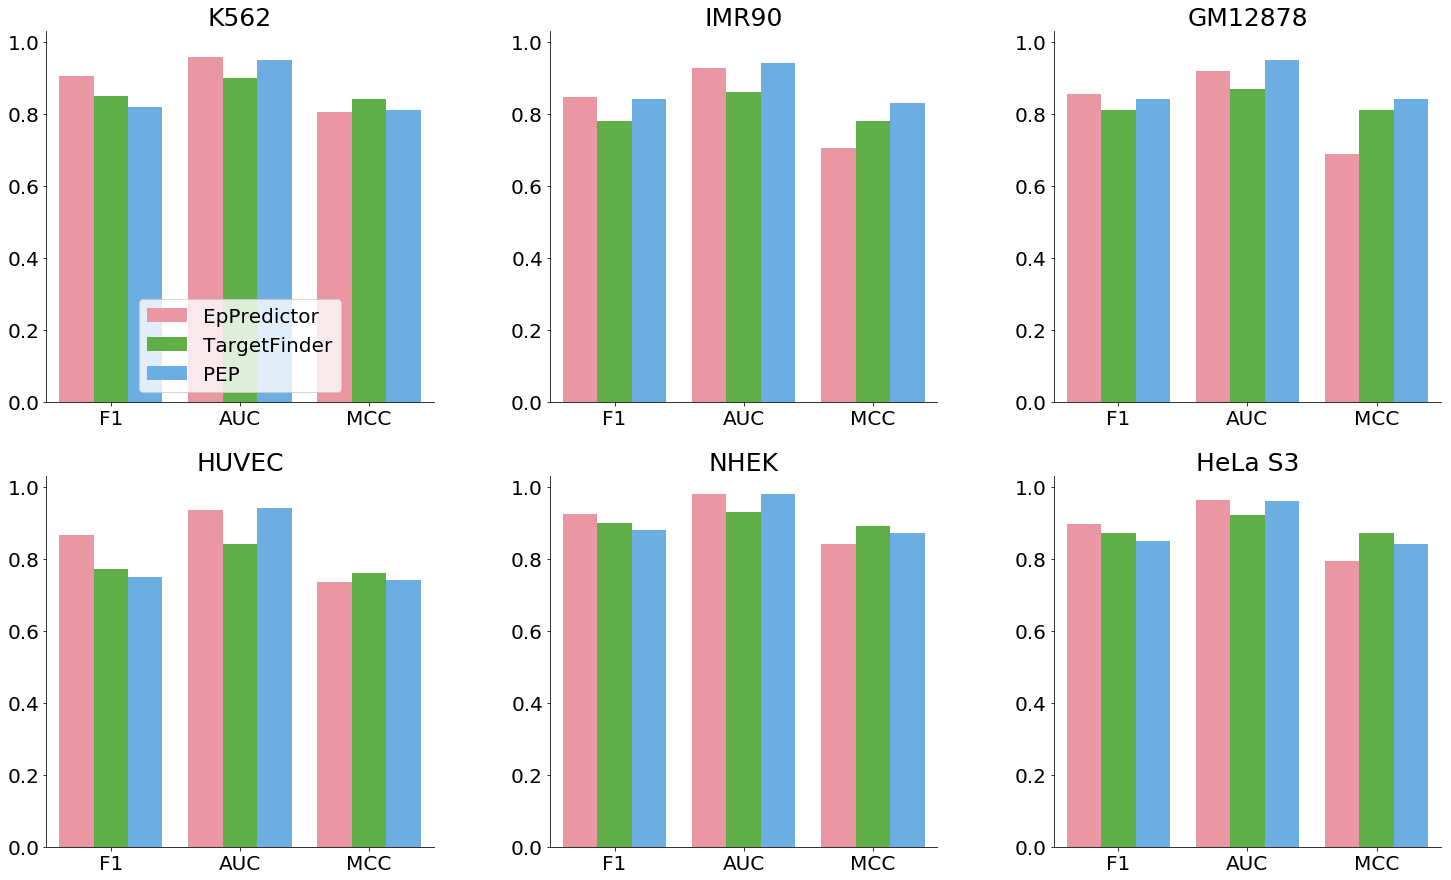

In [111]:
vis()

## 配色

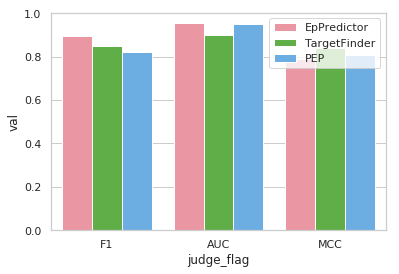

In [97]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("muted",1,0.7)
ax = sns.barplot(x="judge_flag", y="val", hue="", data=k562_info)